In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Problem Statement :
In this notebook, we will try to understand the factors which could affect the demand of electric cycles of a micro-mobility service provider.

In this regard, we will look at the following questions and try to come up with answers and recommendations :
 - Which variables are significant in predicting the demand for shared electric cycles?
 - How well do those variables describe the electric cycle demands?
 
For this purpose, we shall make use of various exploratory visualizations, hypotheses tests and other tests including:

    - 2- Sample T-Test.
    - One-way ANOVA.
    - Chi square test of independence.

Additionally we might require checking the assumptions of the some tests (Normality, Equal Variance). For these we will be using:
- Visualizations like Histogram and Q-Q plot.
- Statistical methods like levene’s test (Equality of Variances), Shapiro-wilk test, Kolmogorov-Smirnov test (Normality Test). 

In [2]:
df = pd.read_csv("data/bike_share.csv")

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

In [5]:
df["datetime"] = pd.to_datetime(df["datetime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
df["datetime"].min()

Timestamp('2011-01-01 00:00:00')

In [7]:
df["datetime"].max()

Timestamp('2012-12-19 23:00:00')

### Statistical Summary

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


### Basic Observations About The Data


- There are around 10886 rows and 12 features (which we describe in detail below).
- There aren't any Null or Missing Values.
- The "datetime" feature was previously of 'object' type and required conversion to 'datetime64' type.

#### Feature Description

 - datetime : datetime - We have observations from 1 January 2011 to 19 December 2012 (almost two years).
 - season : Categorical - season (1: spring, 2: summer, 3: fall, 4: winter) 
 - holiday : Binary (0,1) - whether day is a holiday or not (extracted from ttp://dchr.dc.gov/page/holiday-schedule)
 - workingday : Binary (0,1) - if day is neither weekend nor holiday, this value is 1, otherwise is 0.

- weather : Categorical
  - 1: Clear, Few clouds, partly cloudy, partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Continuous - temperature in Celsius
- atemp : Continuous - feeling temperature in Celsius
- humidity : Continuous - humidity
- windspeed : Continuous - wind speed
- casual : count of casual users
- registered: count of registered users
- count : Dependent Variable - count of total rental bikes including both casual and registered

### Univariate Analysis

#### Distribution of the total number of cycles rented daily

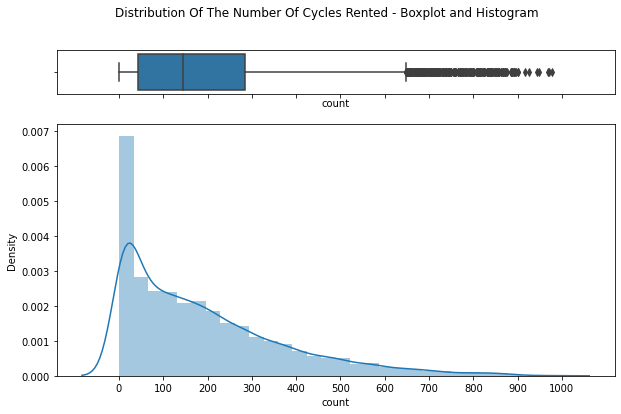

In [9]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(10,6))
sns.boxplot(df["count"], ax=ax_box)
sns.distplot(df["count"], ax=ax_hist, bins=30)
plt.xticks(np.arange(0,1100,100))
plt.suptitle("Distribution Of The Number Of Cycles Rented - Boxplot and Histogram")
plt.show()

We observe a distribution that is skewed towards the right, indicating that on a day, most of the time, the total number of cycles rented is on the lower side. The median number of cycles rented is 145 and mean is 191. As indicated by the boxplot, most of the values lie below 650. 
#### 

#### Distribution of the total number of cycles rented by casual users daily

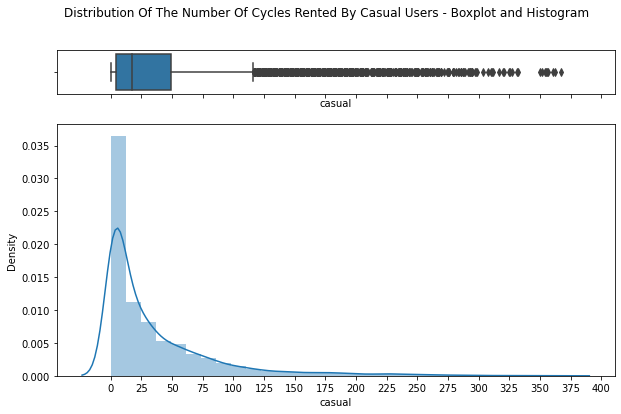

In [10]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,6))
sns.boxplot(df["casual"], ax=ax_box)
sns.distplot(df["casual"], ax=ax_hist, bins=30)
plt.xticks(np.arange(0,425,25))
plt.suptitle("Distribution Of The Number Of Cycles Rented By Casual Users - Boxplot and Histogram")
plt.show()

We again observe a right skewed distribution, indicating that on a day, most of the time, the total number of cycles rented by casual users is on the lower side. The median number of cycles rented by casual users is 17 and mean is 36. As indicated by the boxplot, most of the values lie below 125.
#### 

#### Distribution of the total number of cycles rented by registered users daily

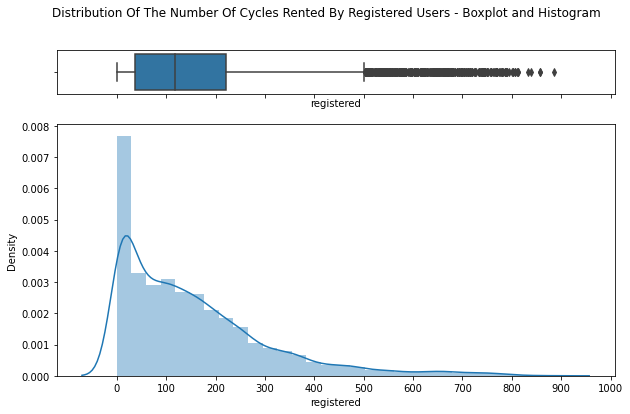

In [11]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,6))
sns.boxplot(df["registered"], ax=ax_box)
sns.distplot(df["registered"], ax=ax_hist, bins=30)
plt.xticks(np.arange(0,1100,100))
plt.suptitle("Distribution Of The Number Of Cycles Rented By Registered Users - Boxplot and Histogram")
plt.show()

We observe a right skewed distribution for registered users as well, but the distribution is more spread out than casual users (which falls more drastically). The median number of cycles rented by registered users is 118 and mean is 155. As indicated by boxplot, most of the values lie below 500. In general we see there are more registered users than casual users.
#### 

#### Distribution of Seasons

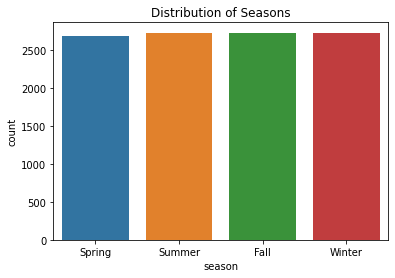

In [12]:
ax = sns.countplot(df["season"])
ax.set_xticklabels(["Spring","Summer","Fall","Winter"])
plt.title("Distribution of Seasons")
plt.show()

In [13]:
df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

We see that the number of observations for each season is similar and is around 2.6 to 2.7K. 
#### 

#### Distribution of Weather

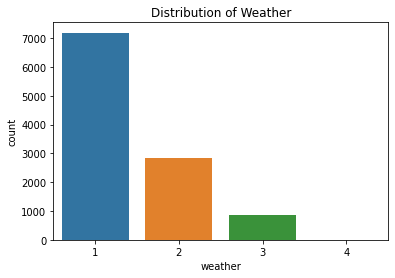

In [14]:
sns.countplot(df["weather"])
plt.title("Distribution of Weather")
plt.show()

In [15]:
df["weather"].value_counts(normalize=True)

1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64

If we recollect our weather patterns :
- 1: Clear, Few clouds, partly cloudy, partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

We see that almost 66% of the observations were recorded during clear and partly cloudy weather. Around 26 % were recorded during misty and cloudy weather and 7% were recorded during rainy (& snowy) weather. A negligible amount (only 1 observation) was recorded during extreme weather conditions.
#### 

#### Temperature Distributions

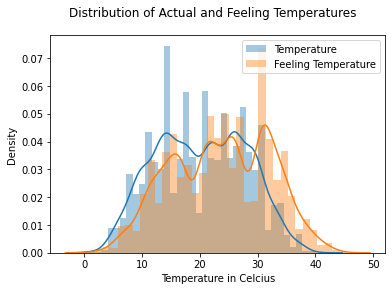

In [16]:
sns.distplot(df["temp"], label="Temperature")
sns.distplot(df["atemp"], label = "Feeling Temperature")
plt.xlabel("Temperature in Celcius")
plt.legend()
plt.suptitle("Distribution of Actual and Feeling Temperatures")
plt.show()

There isn't a great difference between the actual and feeling temperature distributions, but the feeling temperature tends to be a little bit higher than the actual. The  $(25th \ percentile \ , \ 75th \ percentile)$ range for actual temperature is (13,26) and for feeling temperature is (16,31). The mean feeling temperature is also around 3 degrees higher than actual.
#### 

#### Humidity Distribution

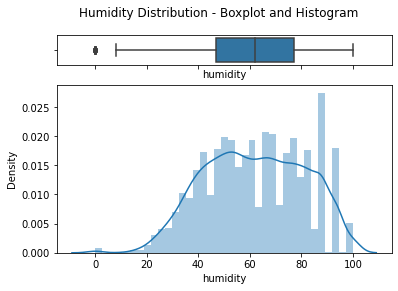

In [17]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["humidity"], ax=ax_box)
sns.distplot(df["humidity"], ax=ax_hist)
plt.suptitle("Humidity Distribution - Boxplot and Histogram")
plt.show()

The humidity tends to be around 62. Most of the time (between 25th and 75th percentile) it tends to lie between 40 and 80.
#### 

#### Distribution of Windspeed

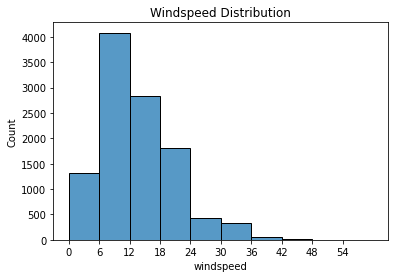

In [18]:
sns.histplot(df["windspeed"], binwidth=6)
plt.xticks(np.arange(0,60,6))
plt.title("Windspeed Distribution")
plt.show()

The maximum number of observations (Around 4000) have windspeed between 6 to 12 kmph. Around 2800 observations have windspeed between 12 to 18 kmph and around 1800 observations have windspeed between 18 to 24 kmph. 
#### 

#### Distribution of Woking vs Non-Working Days

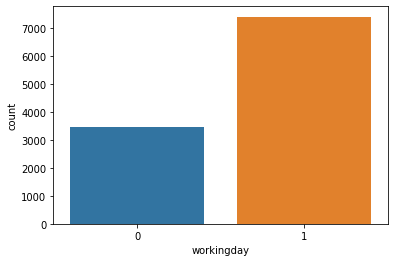

In [19]:
sns.countplot(df["workingday"])
plt.show()

In [20]:
df["workingday"].value_counts(normalize=True)

1    0.680875
0    0.319125
Name: workingday, dtype: float64

Around 68% of the observations were recorded on working days and 32% were recorded on non working days.
#### 

In [21]:
df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [22]:
df_control = df[df["workingday"]==0]
df_treatment = df[df["workingday"]==1]

### Bivariate Analysis

In [23]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### Number of Cycles Rented on Working Day vs Non Working Day

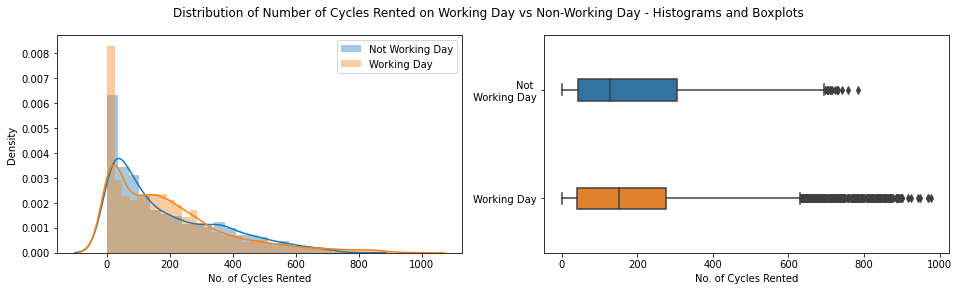

In [24]:
f, (ax_hist, ax_box) = plt.subplots(1,2,figsize=(16,4))
sns.distplot(df[df["workingday"]==0]["count"], label="Not Working Day", ax=ax_hist)
sns.distplot(df[df["workingday"]==1]["count"], label="Working Day", ax=ax_hist)
ax_hist.set_xlabel("No. of Cycles Rented")
ax_hist.legend()

sns.boxplot(x = "count",y ="workingday",data=df,width = 0.2, orient="h",ax=ax_box)
ax_box.set_yticklabels(["Not \n Working Day","Working Day"])
ax_box.set_ylabel(" ")
ax_box.set_xlabel("No. of Cycles Rented")

plt.suptitle("Distribution of Number of Cycles Rented on Working Day vs Non-Working Day - Histograms and Boxplots")
plt.show()

In [25]:
df.groupby("workingday")["count"].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

In [26]:
df.groupby("workingday")["count"].median()

workingday
0    128.0
1    151.0
Name: count, dtype: float64

We do not see significant differences in the distributions from the plots. The mean counts only vary by 5 cycles more on working days. The median for working day is 151 and for non working day is 128.
#### 

#### Distribution of Number of Cycles Rented During Different Seasons

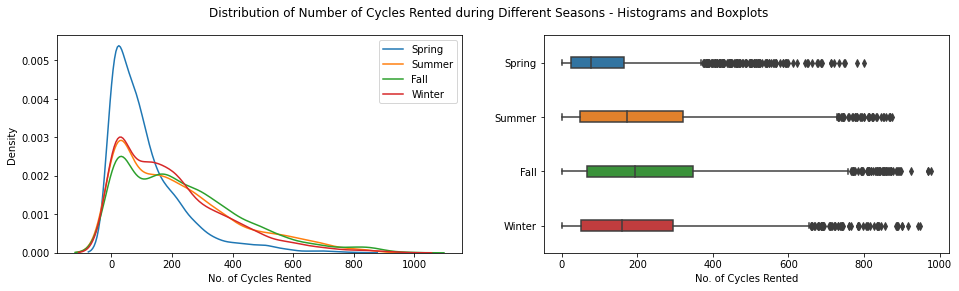

In [27]:
f, (ax_hist, ax_box) = plt.subplots(1,2,figsize=(16,4))
sns.distplot(df[df["season"]==1]["count"], label="Spring", hist=False, ax=ax_hist)
sns.distplot(df[df["season"]==2]["count"], label="Summer", hist=False, ax=ax_hist)
sns.distplot(df[df["season"]==3]["count"], label="Fall", hist=False, ax=ax_hist)
sns.distplot(df[df["season"]==4]["count"], label="Winter", hist=False, ax=ax_hist)
ax_hist.set_xlabel("No. of Cycles Rented")
ax_hist.legend()

sns.boxplot(x = "count",y ="season",data=df,width = 0.2, orient="h",ax=ax_box)
ax_box.set_yticklabels(["Spring","Summer","Fall","Winter"])
ax_box.set_ylabel(" ")
ax_box.set_xlabel("No. of Cycles Rented")
plt.suptitle("Distribution of Number of Cycles Rented during Different Seasons - Histograms and Boxplots")
plt.show()

It appears that the distribution for Spring is vastly different from that of the other seasons. As it appears from the box plot, Spring seems to have the lowest spread among all the seasons, with most of the daily rented cycle counts being under 400. Summer, Fall and Winter have most of their counts under 700/800.
#### 

#### Distribution of Number of Cycles Rented During Different Weather

We ignore the weather type 4 here, since there is only 1 observation pertaining to that extreme weather.

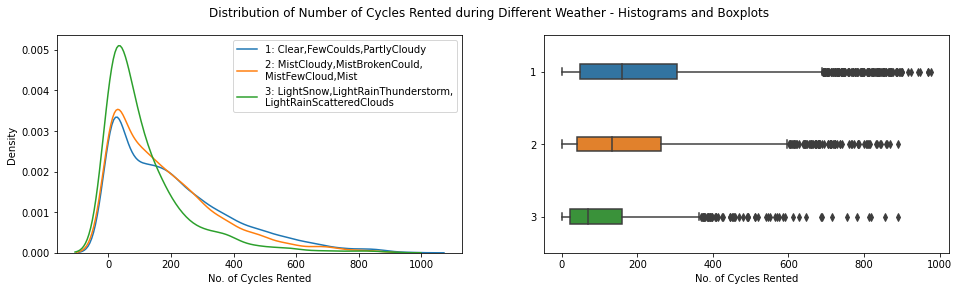

In [28]:
f, (ax_hist, ax_box) = plt.subplots(1,2,figsize=(16,4))
sns.distplot(df[df["weather"]==1]["count"], label="1: Clear,FewCoulds,PartlyCloudy", hist=False, ax=ax_hist)
sns.distplot(df[df["weather"]==2]["count"], label="2: MistCloudy,MistBrokenCould,\nMistFewCloud,Mist", hist=False, ax=ax_hist)
sns.distplot(df[df["weather"]==3]["count"], label="3: LightSnow,LightRainThunderstorm,\nLightRainScatteredClouds", hist=False, ax=ax_hist)
#sns.distplot(df[df["weather"]==4]["count"], label="HeavyRainIcePalletThunderstormMist,SnowFog", hist=False, ax=ax_hist)
ax_hist.set_xlabel("No. of Cycles Rented")
ax_hist.legend()

sns.boxplot(x = "count",y ="weather",data=df[~(df["weather"]==4)],width = 0.2, orient="h",ax=ax_box)
#ax_box.set_yticklabels(["Spring","Summer","Fall","Winter"])
ax_box.set_ylabel(" ")
ax_box.set_xlabel("No. of Cycles Rented")
plt.suptitle("Distribution of Number of Cycles Rented during Different Weather - Histograms and Boxplots")
plt.show()

 - 1: Clear, Few clouds, partly cloudy, partly cloudy
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 
 Clear & Partly Cloudy weather (1) and Mistly & Cloudy weather have similar distributions. We have a wider range of counts for clear weather, with most lying under 700. Counts for Misty Cloudy weather lie under 600. Rainy weather has a very different distribution of counts, with most counts lying below 400, which is understandable since people would avoid commuting in the rain. 
 #### 

#### Weather and Seasonal Variations

In [29]:
pd.crosstab(df["season"],df["weather"])

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


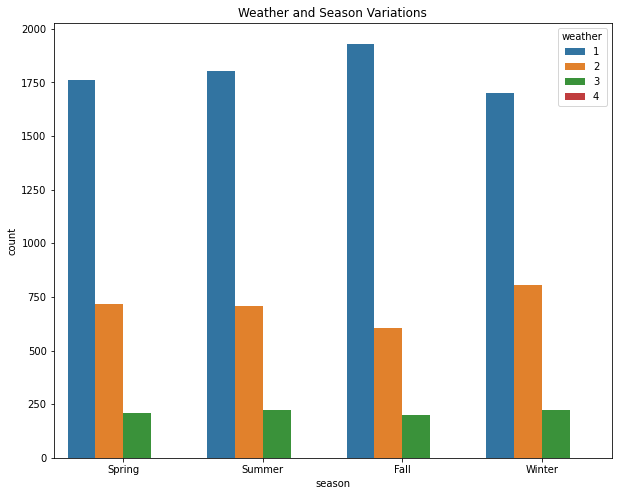

In [30]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="season", hue="weather", data=df)
ax.set_xticklabels(["Spring","Summer","Fall","Winter"])
plt.title("Weather and Season Variations")
plt.show()

We see that the weather does not really stay the same across seasons. For example, if we pick clear weather (1), we see that there were more days with such weather in Fall, than in any other season. Winter seems to have the least number of days with clear weather.

Misty and Cloudy weather (2) was most predominant in winter and least in Fall.

Rainy weather was similarly predominant in Summer and Winter. 

#### Temperature vs Count of Cycles Rented

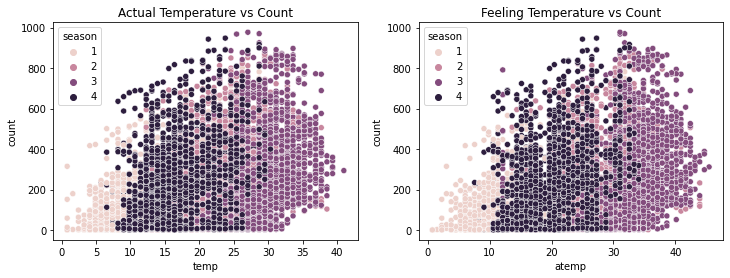

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
sns.scatterplot(x="temp",y="count",hue="season",data=df, ax = ax1)
ax1.set_title("Actual Temperature vs Count")
sns.scatterplot(x="atemp",y="count",hue="season",data=df, ax = ax2)
ax2.set_title("Feeling Temperature vs Count")
plt.show()

There is no clear relation between temperature and number of cycles rented in a day.
#### 

#### Windspeed vs Count of Cycles Rented

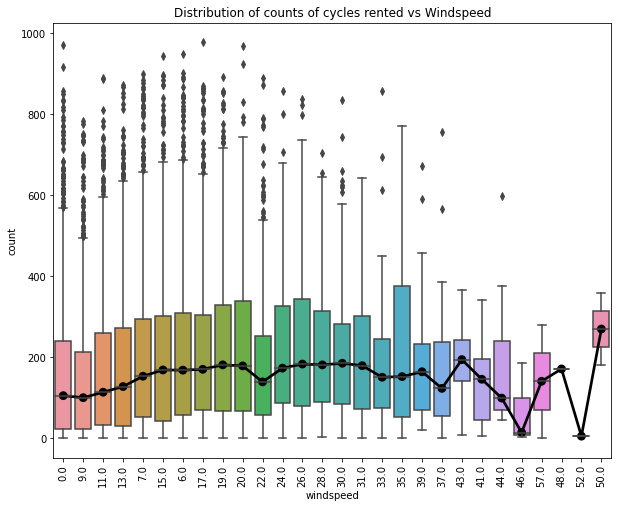

In [32]:
x = df["windspeed"].value_counts().index
y = [np.median(df[df['windspeed']==ws]['count']) for ws in x]

plt.figure(figsize=(10,8))

sns.pointplot(x=x, y=y, lw=0.05, color='k')

ax = sns.boxplot(x="windspeed",y="count",data=df)
ax.set_xticklabels(np.round(x))
plt.xticks(rotation=90)
plt.title("Distribution of counts of cycles rented vs Windspeed")
plt.show()

The median count seems to rise from windspeed 0 to windspped 20. It takes a dip at windespeed 22, but then again rises and stays constant (below 200) till windspeed 31, before starting to decline. There is an exception when it rises again at 43, but then steadily declines till 46. Beyond that, the values can be considered as outliers and hence ignored. 
#### 

#### Humidity vs Count of Cycles Rented

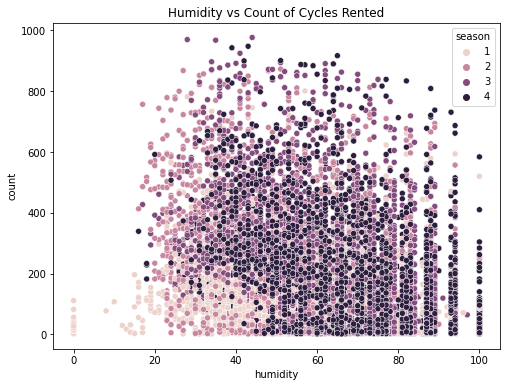

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="humidity",y="count",hue="season",data=df)
plt.title("Humidity vs Count of Cycles Rented")
plt.show()

There is no clear relation between humidity and number of cycles rented in a day.
#### 

## Hypothesis Testing

### 1. Does the number of bicycles rented depend on working day?

We will begin by testing whether the number of bicycles rented depends on whether it is a working day or not.

More specifically we will use the 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented.

But first, we will check the assumptions of the test (Normality, Equal Variance).
- We will use visualizations like Histogram and Q-Q plot.
- We will also use statistical methods like levene’s test (Equality of Variances), Shapiro-wilk test, Kolmogorov-Smirnov test (Normality Test). 

#### Shapiro Wilk Test

In [34]:
from scipy.stats import shapiro


df_control = df[df["workingday"]==0]["count"]
df_treatment = df[df["workingday"]==1]["count"]

shapiro(df_treatment)

C:\Users\ANWESHA\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8702576160430908, pvalue=0.0)

In [35]:
print(df_control.shape[0],",",df_treatment.shape[0])

3474 , 7412


Since the shapiro test will not be accurate for sample sizes greater than 5000, we will pick random samples of size 3000 each from control and treatment and run the test.

In [36]:
df_control_samp = df_control.sample(n=3000)
df_treatment_samp = df_treatment.sample(n=3000)

In [37]:
shapiro(df_control_samp)

ShapiroResult(statistic=0.883791446685791, pvalue=8.744102417386859e-43)

In [38]:
shapiro(df_treatment_samp)

ShapiroResult(statistic=0.8722302913665771, pvalue=2.942726775082116e-44)

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. Since the p-value is much less than 0.05 and we are considering 95% significance, we can reject the null. So according to Shapiro-Wilk test, our data is not drawn from a normal distribution. This is also apparent from the plots of the distributions, which show skewed data.

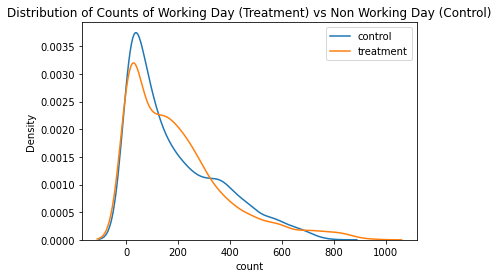

In [39]:
sns.distplot(df_control_samp, hist=False,label="control")
sns.distplot(df_treatment_samp, hist=False,label="treatment")
plt.legend()
plt.title("Distribution of Counts of Working Day (Treatment) vs Non Working Day (Control)")
plt.show()

#### Kolmogorov Smirnov Test 

In [40]:
from scipy.stats import kstest, normaltest, norm

Using 'norm' for our input parameter to kstest will check if the distribution of our data is the same as scipy.stats.norm.cdf with default parameters: loc=0, scale=1. We employ two methods to apply the test on our data.

#### Method 1: 
We fit a normal distribution to our data and then check if the data and the distribution are the same using the Kolmogorov–Smirnov test.

In [41]:
loc_c, scale_c = norm.fit(df_control)
loc_t, scale_t = norm.fit(df_treatment)

n_c = norm(loc=loc_c, scale=scale_c)
n_t = norm(loc=loc_t, scale=scale_t)

kstest(df_control, n_c.cdf)

KstestResult(statistic=0.1401843203693275, pvalue=5.057241089645542e-60)

In [42]:
kstest(df_treatment, n_t.cdf)

KstestResult(statistic=0.14900556265832038, pvalue=4.0540505565996533e-144)

#### Method 2:
We standardize our data and then apply the kstest on it.

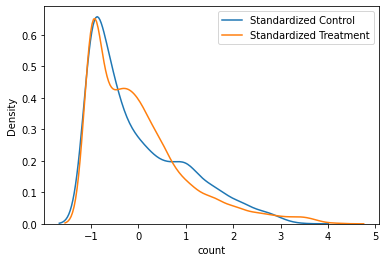

In [43]:
df_control_std = (df_control - df_control.mean())/df_control.std()
df_treatment_std = (df_treatment - df_treatment.mean())/df_treatment.std()

sns.distplot(df_control_std,hist=False,label="Standardized Control")
sns.distplot(df_treatment_std,hist=False,label="Standardized Treatment")
plt.legend()

In [44]:
kstest(df_control_std,'norm')

KstestResult(statistic=0.1402189378184256, pvalue=4.72449275623468e-60)

In [45]:
kstest(df_treatment_std,'norm')

KstestResult(statistic=0.14902186003582568, pvalue=3.769653315060318e-144)

We see that we get similar test-statistic value and p-values from both methods of performing KS test. 

The null hypothesis for KS test says that the two distributions are identical, that is, the control/treatment and normal distribution are identical. Our p-value is much less than 0.05, so we reject the Null. So, our we conclude that our distributions are not normal.

#### Q-Q plot 

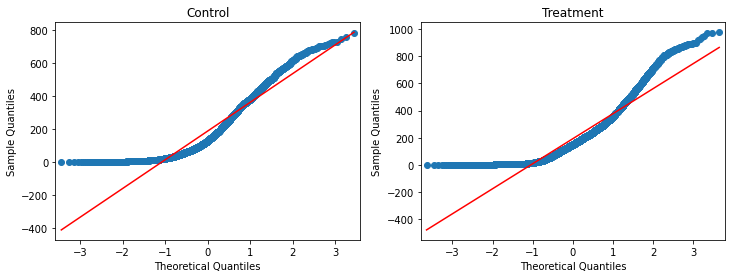

In [46]:
import statsmodels.api as sms
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,4))

sms.qqplot(df_control, line='s',label="Control", ax=ax1)
ax1.set_title("Control")
sms.qqplot(df_treatment, line='s', label="Treatment", ax=ax2)
ax2.set_title("Treatment")
plt.show()

So here again we see significant deviation from normal distribution. We can conclude that our samples are not really drawn from normal distributions.

#### Levene's Test for Equality of Variance

In [47]:
stats.levene(df_control,df_treatment, center='median') #better choice for skewed distribuions.

LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)

In [48]:
stats.levene(df_control,df_treatment, center='mean')

LeveneResult(statistic=0.9606739790242115, pvalue=0.3270389131557905)

So, in both cases, the p-value is not less than 0.05. So, we fail to reject the Null Hypothesis. This means we do not have sufficient evidence to say that the variance in counts between control and treatment is significantly different.

In other words, the variances of the two groups seems to be equal.

In [49]:
stats.levene(df_control_samp,df_treatment_samp)

LeveneResult(statistic=0.2755683922640088, pvalue=0.599640073084596)

### 2 Sample T-Test

In [50]:
stats.ttest_ind(df_control,df_treatment)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

So we see that p-value > 0.05, Hence we cannot reject the Null hypothesis that the mean counts of number of cycles rented is equal for the two groups (working day and non working day). So, the mean counts for two groups can be considered equal, and hence we can say that the number of cycles rented doesn't depend on working day. 

In [51]:
df_control.mean()

188.50662061024755

In [52]:
df_treatment.mean()

193.01187263896384

#### 
### 2. Does the number of cycles rented depend on weather?

In [53]:
df.groupby(["weather"])["count"].mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

The means appear to be quite different. We will set up a formal hypothesis test to verify the same.

In [54]:
dfw1 = df[df.weather==1]
dfw2 = df[df.weather==2]
dfw3 = df[df.weather==3]
dfw4 = df[df.weather==4]

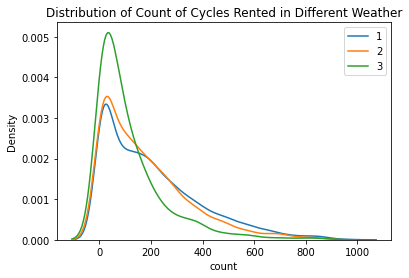

In [55]:
sns.distplot(dfw1["count"], hist=False, label="1")
sns.distplot(dfw2["count"], hist=False, label="2")
sns.distplot(dfw3["count"], hist=False, label="3")
#sns.distplot(dfw4["count"], label="4")
plt.legend()
plt.title("Distribution of Count of Cycles Rented in Different Weather")
plt.show()

It is evident from the plot that the samples are not drawn from normal distribution. We still perform some normality tests to concretely prove that they are not drawn from normal distributions.

#### Shapiro Wilk Test

In [56]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [57]:
shapiro(dfw1["count"].sample(3000))

ShapiroResult(statistic=0.895101010799408, pvalue=3.181648163249497e-41)

In [58]:
shapiro(dfw2["count"])

ShapiroResult(statistic=0.8767690658569336, pvalue=9.781063280987223e-43)

In [59]:
shapiro(dfw3["count"])

ShapiroResult(statistic=0.7674333453178406, pvalue=3.876134581802921e-33)

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. Since the p-value is much less than 0.05 and we are considering 95% significance, we can reject the null. So according to Shapiro-Wilk test, our data is not drawn from a normal distribution.

#### Q-Q Plot

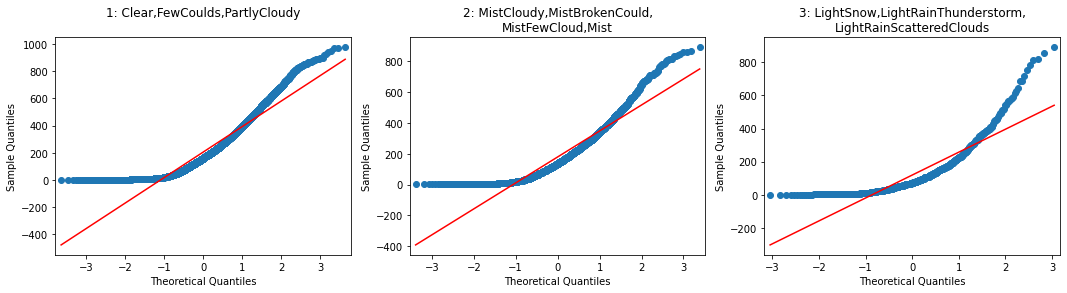

In [60]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (18,4))

sms.qqplot(dfw1["count"], line='s', ax=ax1)
ax1.set_title("1: Clear,FewCoulds,PartlyCloudy\n")
sms.qqplot(dfw2["count"], line='s', ax=ax2)
ax2.set_title("2: MistCloudy,MistBrokenCould,\nMistFewCloud,Mist")
sms.qqplot(dfw3["count"], line='s',ax=ax3)
ax3.set_title("3: LightSnow,LightRainThunderstorm,\nLightRainScatteredClouds")
plt.show()

So here again we see significant deviation from normal distribution. We can conclude that our samples are not really drawn from normal distributions.

#### Levene's Test for Equality of Variance

In [61]:
stats.levene(dfw1["count"],dfw2["count"],dfw3["count"], center = 'median')

LeveneResult(statistic=81.67574924435011, pvalue=6.198278710731511e-36)

In [62]:
stats.levene(dfw1["count"],dfw2["count"],dfw3["count"], center = 'mean')

LeveneResult(statistic=91.51029192539873, pvalue=3.873392364556122e-40)

So, in both cases, the p-value is less than 0.05. So, reject the Null Hypothesis. This means we have sufficient evidence to say that the variance in counts between the groups is significantly different.

In other words, the variances of the 3 groups are not equal.

### One-Way ANOVA

In [63]:
stats.f_oneway(dfw1["count"],dfw2["count"],dfw3["count"])

F_onewayResult(statistic=98.28356881946706, pvalue=4.976448509904196e-43)

So, the p-value is less than 0.05. We can reject the null hypothesis that the mean of all the groups is same. In other words, the mean number of cycle rented varies from one weather to other, and is not same across weathers.

The mean number of cycles rented follows the order:
1 > 2 > 4 > 3

If we ignore the single observation from weather 4, we would get the order:
1 > 2 > 3

Where the numbers have the following "weather" meanings:
  - 1: Clear, Few clouds, partly cloudy, partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

### 3. Does the number of cycles rented depend on season?

In [64]:
df.groupby(["season"])["count"].mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

In [65]:
dfs1 = df[df.season==1]
dfs2 = df[df.season==2]
dfs3 = df[df.season==3]
dfs4 = df[df.season==4]

The means appear to be quite different. We will set up a formal hypothesis test to verify the same.

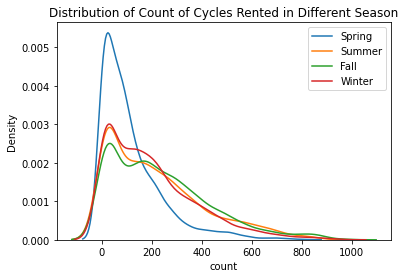

In [66]:
sns.distplot(dfs1["count"], hist=False, label="Spring")
sns.distplot(dfs2["count"], hist=False, label="Summer")
sns.distplot(dfs3["count"], hist=False, label="Fall")
sns.distplot(dfs4["count"], hist=False, label="Winter")
plt.legend()
plt.title("Distribution of Count of Cycles Rented in Different Season")
plt.show()

It is evident from the plot that the samples are not drawn from normal distribution. We still perform some normality tests to concretely prove that they are not drawn from normal distributions.

#### Shapiro Wilk Test

In [67]:
df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [68]:
shapiro(dfs1["count"])

ShapiroResult(statistic=0.8087379336357117, pvalue=0.0)

We see that the shapiro test gives a p value of 0.0 with season 1 sample. So we perform KS test for it.

In [69]:
loc, scale = norm.fit(dfs1["count"])
ns1 = norm(loc=loc,scale=scale)
kstest(dfs1["count"],ns1.cdf)

KstestResult(statistic=0.17855145269113365, pvalue=2.1904550525484577e-75)

The KS test tests the null hypothesis that both the distributions (season 1 sample and normal distribution) are same. However, our p value < 0.05, so we reject the Null. Thus we can say that the Season 1 sample is not drawn from a normal distribution.

In [70]:
shapiro(dfs2["count"])

ShapiroResult(statistic=0.9004813432693481, pvalue=6.038565025570219e-39)

In [71]:
shapiro(dfs3["count"])

ShapiroResult(statistic=0.9148167371749878, pvalue=1.0437356147871525e-36)

In [72]:
shapiro(dfs4["count"])

ShapiroResult(statistic=0.8954642415046692, pvalue=1.130082751748606e-39)

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. Since the p-value is much less than 0.05 and we are considering 95% significance, we can reject the null. So according to Shapiro-Wilk test, our data is not drawn from a normal distribution.

#### Q-Q Plot

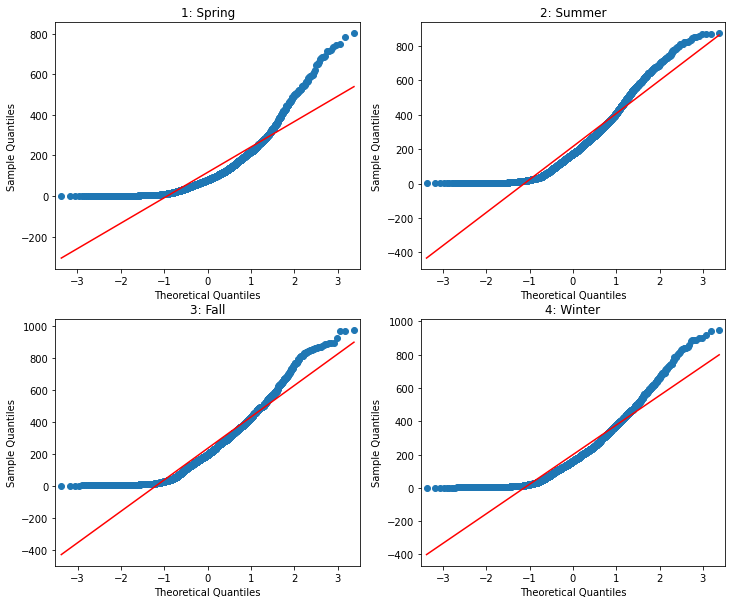

In [73]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (12,10))

sms.qqplot(dfs1["count"], line='s',ax=ax1)
ax1.set_title("1: Spring")
sms.qqplot(dfs2["count"], line='s',ax=ax2)
ax2.set_title("2: Summer")
sms.qqplot(dfs3["count"], line='s',ax=ax3)
ax3.set_title("3: Fall")
sms.qqplot(dfs4["count"], line='s',ax=ax4)
ax4.set_title("4: Winter")
plt.show()

So here again we see significant deviation from normal distribution. We can conclude that our samples are not really drawn from normal distributions.

#### Levene's Test for Equality of Variance

In [74]:
stats.levene(dfs1["count"],dfs2["count"],dfs3["count"],dfs4["count"], center = 'median')

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

In [75]:
stats.levene(dfs1["count"],dfs2["count"],dfs3["count"],dfs4["count"], center = 'mean')

LeveneResult(statistic=212.51051133288894, pvalue=5.725941205064937e-134)

So, in both cases, the p-value is less than 0.05. So, reject the Null Hypothesis. This means we have sufficient evidence to say that the variance in counts between the groups is significantly different.

### One-Way ANOVA

In [76]:
stats.f_oneway(dfs1["count"],dfs2["count"],dfs3["count"],dfs4["count"])

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

So, the p-value is less than 0.05. We can reject the null hypothesis that the mean of all the groups is same. In other words, the mean number of cycle rented varies from one season to other, and is not same across seasons.

The mean number of cycles rented follows the order:
Fall > Summer > Winter > Spring

#### 
### 4. Does weather depend on the season ?

In [77]:
from scipy.stats import chi2_contingency

In [78]:
pd.crosstab(df["weather"],df["season"]).transpose()

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [79]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df["weather"],df["season"]))
expected

array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]])

The above expected contingency table violates one of the four assumptions of the chi-square test : The expected value of cells in the contingency table should be 5 or greater in at least 80% of cells and that no cell should have an expected value less than 1.
Since there is only one observation of weather type 4, we ignore it in our analysis.

In [80]:
ctab_no_4 = pd.crosstab(df[df["weather"]!=4]["weather"],df[df["weather"]!=4]["season"])
ctab_no_4.transpose()

weather,1,2,3
season,,,
1,1759,715,211
2,1801,708,224
3,1930,604,199
4,1702,807,225


In [81]:
stat, p, dof, expected = chi2_contingency(ctab_no_4)

In [82]:
expected

array([[1774.04869086, 1805.76352779, 1805.76352779, 1806.42425356],
       [ 699.06201194,  711.55920992,  711.55920992,  711.81956821],
       [ 211.8892972 ,  215.67726229,  215.67726229,  215.75617823]])

In [83]:
print("The chi square statistic is : ",stat)
print("The degree of freedom is : (4-1)x(3-1) = ",dof)
print("The critical chi square value for 95% confidence : ",stats.chi2.ppf(q=0.95,df=dof))

The chi square statistic is :  46.101457310732485
The degree of freedom is : (4-1)x(3-1) =  6
The critical chi square value for 95% confidence :  12.591587243743977


Since our chi square statistic is greater than the critical value, we will reject the null hypothesis that there is no relation between weather and season.

In [84]:
p #p-value

2.8260014509929403e-08

P-value is also less than 0.05, which further substantiates what we saw earlier, and we reject the null.

So there is in fact, a relation between weather and season.

In [85]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df["weather"],df["season"]))

In [86]:
p

1.5499250736864862e-07